# Exercício 1

In [1]:
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output, HTML, display
from matplotlib.gridspec import GridSpec
import tabulate

In [2]:
def apply_method(f, x):
    return [
        f(xi) for xi in x
    ]

In [3]:
def multiply_lists(a, b):
    if len(a) == len(b):
        result = []
        for i in range(len(a)):
            result.append(a[i]*b[i])
            
        return result
    
    else:
        return None

In [4]:
def echelon_form(matrix, y):
    
    for j in range(len(m)-1):
        if m[j][j] == 0:
            k = 0
            for k in range(j+1, len(m)):
                if m[k][j] != 0:
                    m[k], m[j] = m[j], m[k]
                    break
            
            if k == len(m):
                return None
        
        for i in range(j+1, len(m)):
            m_i = -m[i][j] / m[j][j]
            
            for k in range(j, len(m)):
                m[i][k] += m_i * m[j][k]
                
            y[i] += m_i * y[j]
            
    
    return m

In [5]:
def gauss(a, b):
    m_echelon_form = echelon_form(a, b)
    matrix_values = m_echelon_form
    
    __x = [0.0 for i in range(len(matrix_values))]
    
    for i in range(len(matrix_values)-1, -1, -1):
        xi = b[i]
        
        for j in range(i+1, len(matrix_values)):
            xi -= matrix_values[i][j] * __x[j]
        
        xi /= matrix_values[i][i]
        __x[i] = xi
    
    return __x

In [6]:
t = [i for i in range(0, 30)]

In [7]:
x = [0.0, 1, 2.4, 4.1, 6, 8.2, 10.6, 13.4, 16.4, 19.7, 
     23.3, 27, 31.2, 35.5, 40.1, 45, 50.2, 55.6, 61.3, 67.3,
     73.6, 80.1, 86.9, 94, 101.3, 109, 116.9, 125, 133.4, 142.1]

In [8]:
f = [lambda x: 1, lambda x: x, lambda x: x*x]

In [9]:
m = []
c = []

for fi in f:
    mi = []
    fi_t = apply_method(fi, t)
    for fj in f:
        fj_t = apply_method(fj, t)
        multiplied_list = multiply_lists(fi_t, fj_t)
        mi.append(sum(multiplied_list))
        
    m.append(mi)
    ci = multiply_lists(fi_t, x)
    c.append(sum(ci))

print(f"m = {m}")
print(f"c = {c}")

m = [[30, 435, 8555], [435, 8555, 189225], [8555, 189225, 4463999]]
c = [1580.6, 33936.4, 788446.6]


In [10]:
alphas = gauss([row[:] for row in m], c.copy())

st = f"g(x) = {alphas[0]:.4f} + ({alphas[1]:.4f})*x + ({alphas[2]:.4f})*x²"
g = lambda x: alphas[0]*f[0](x) + alphas[1]*f[1](x) + alphas[2]*f[2](x)

print(st)

g(x) = -0.0496 + (0.9710)*x + (0.1356)*x²


In [11]:
a = 2*alphas[2]
a

0.2711177101541376

In [12]:
SI_a = a * 1e-2 / (1/60) ** 2

print(f"a = {SI_a} m/s²")

a = 9.760237565548953 m/s²


# Exercício 2

## Tarefa 1

In [13]:
runge = lambda x: 1 / (1 + 25 * x * x)
logxplus2 = lambda x: math.log(x+2)
sinx = lambda x: math.sin(x)

In [14]:
def equal_distance_nodes(n):
    return [
        -1 + 2 * j / n for j in range(n+1)
    ]

In [15]:
def chebyshev_nodes(n):
    return [
        math.cos(j * math.pi / n) for j in range(n+1)
    ]

In [16]:
def lagrange_polinomy(i, points, value):
    x = [
        xx for xx, yy in points
    ]
    
    elements = []
    for m in range(len(points)):
        if m != i:
            element = (value - x[m]) / (x[i] - x[m])
            elements.append(element)
        
    return math.prod(elements)
            

In [17]:
def lagrange_interpolation(points, value):
    y = [
        yy for xx, yy in points
    ]
    
    lagrange_polinomies = []
    for i in range(len(points)):
        lagrange_polinomies.append(lagrange_polinomy(i, points, value)*y[i])
        
    return sum(lagrange_polinomies)

In [18]:
def divided_difference(points):
    m = [[]]
    x = [
        xx for xx, yy in points
    ]
    y = [
        yy for xx, yy in points
    ]
    
    k = len(points)

    for i in range(1, k+1):
        m.append([None, y[i-1]])
        
    for j in range(2, k+1):
        for i in range(1, k-j+2):
            v = 1/(x[i+j-2] - x[i-1]) * (m[i+1][j-1] - m[i][j-1])
            m[i].append(v)
            
    return m[1]
    

In [19]:
def newton_interpolation(points, value):
    coefficients = divided_difference(points)[1:]
    
    x = [
        xx for xx, yy in points
    ]
    
    multiplied = []
    for i in range(len(points)):
        multiply = coefficients[i]
        for j in range(i):
            multiply *= (value-x[j])
        
        multiplied.append(multiply)
    
    
    return sum(multiplied)

In [20]:
chebyshev_points = lambda n, f: [
    (x, f(x)) for x in chebyshev_nodes(n)
]

equal_distance_points = lambda n, f: [
    (x, f(x)) for x in equal_distance_nodes(n)
]

In [21]:
error = lambda f, points, x, interpol_f: abs(f(x) - interpol_f(points, x))
max_error = lambda f, points, test_points, interpol_f: max([error(f, points, x, interpol_f) for x in test_points])

In [22]:
def _max_chebyshev_error_log(f, n, nodes_test, interpol_f):
    return math.log(max_error(
        f, chebyshev_points(n, f), nodes_test, interpol_f
    ), 10)

In [23]:
def _max_equal_distance_error_log(f, n, nodes_test, interpol_f):
    return math.log(max_error(
        f, equal_distance_points(n, f), nodes_test, interpol_f
    ), 10)

In [24]:
nodes_test = equal_distance_nodes(10117)

number_of_interpolators = 2
number_of_functions = 3

lambda_calls = {
    "Lagrange": {
        "log(x+2)": {
            "chebyshev": lambda n: _max_chebyshev_error_log(
                logxplus2, n, nodes_test, lagrange_interpolation
            ),
            "equal": lambda n: _max_equal_distance_error_log(
                logxplus2, n, nodes_test, lagrange_interpolation
            )
        },
        "Runge(x)": {
            "chebyshev": lambda n: _max_chebyshev_error_log(
                runge, n, nodes_test, lagrange_interpolation
            ),
            "equal": lambda n: _max_equal_distance_error_log(
                runge, n, nodes_test, lagrange_interpolation
            )
        },
        "sin(x)": {
            "chebyshev": lambda n: _max_chebyshev_error_log(
                sinx, n, nodes_test, lagrange_interpolation
            ),
            "equal": lambda n: _max_equal_distance_error_log(
                sinx, n, nodes_test, lagrange_interpolation
            )
        }
    },
    "Newton": {
        "log(x+2)": {
            "chebyshev": lambda n: _max_chebyshev_error_log(
                logxplus2, n, nodes_test, newton_interpolation
            ),
            "equal": lambda n: _max_equal_distance_error_log(
                logxplus2, n, nodes_test, newton_interpolation
            )
        },
        "Runge(x)": {
            "chebyshev": lambda n: _max_chebyshev_error_log(
                runge, n, nodes_test, newton_interpolation
            ),
            "equal": lambda n: _max_equal_distance_error_log(
                runge, n, nodes_test, newton_interpolation
            )
        },
        "sin(x)": {
            "chebyshev": lambda n: _max_chebyshev_error_log(
                sinx, n, nodes_test, newton_interpolation
            ),
            "equal": lambda n: _max_equal_distance_error_log(
                sinx, n, nodes_test, newton_interpolation
            )
        }
    }
    
}

errors = {
    "Lagrange": {
        "log(x+2)": {
            "chebyshev": [],
            "equal": []
        },
        "Runge(x)": {
            "chebyshev": [],
            "equal": []
        },
        "sin(x)": {
            "chebyshev": [],
            "equal": []
        }
    },
    "Newton": {
        "log(x+2)": {
            "chebyshev": [],
            "equal": []
        },
        "Runge(x)": {
            "chebyshev": [],
            "equal": []
        },
        "sin(x)": {
            "chebyshev": [],
            "equal": []
        }
    }
}

n_list = list(range(2, 101))

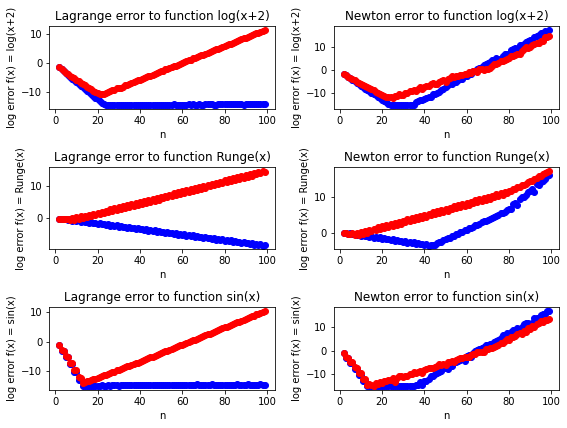

n = 99


In [25]:
plt.ion()
for n in n_list:
    clear_output(wait=True)
    figure = plt.figure(figsize=(8,6))
    
    gs = GridSpec(number_of_functions, number_of_interpolators)
    line, column = 0, 0
    a = {}
    for interpolation_method, functions in lambda_calls.items():        
        for function, points in functions.items():
            a[line, column] = figure.add_subplot(gs[line, column])
            for point_type, f in points.items():
                errors[interpolation_method][function][point_type].append(f(n))
                a[line, column].plot(
                    n_list[:n-1], 
                    errors[interpolation_method][function][point_type],
                    'bo' if point_type == 'chebyshev' else 'ro'
                )
                    
            a[line, column].set_xlabel("n")
            a[line, column].set_ylabel("log error f(x) = " + function)
            title = f"{interpolation_method} error to function {function}"
            a[line, column].set_title(title)
            line += 1
    
        column += 1
        line = 0
    
    figure.tight_layout()
    plt.show()
    print(f"n = {n}")
    plt.pause(1e-4)
    

In [30]:
values_runge = [
    [
        'n', 
        'lagrange chebyshev nodes error', 
        'newton chebyshev nodes error', 
        'lagrange equal distance nodes error',
        'newton equal distance nodes error'
    ]
]
values_sin = [
    [
        'n', 
        'lagrange chebyshev nodes error', 
        'newton chebyshev nodes error', 
        'lagrange equal distance nodes error',
        'newton equal distance nodes error'
    ]
]
values_log = [
    [
        'n', 
        'lagrange chebyshev nodes error', 
        'newton chebyshev nodes error', 
        'lagrange equal distance nodes error',
        'newton equal distance nodes error'
    ]
]

for i in range(0, len(n_list), 8):
    values_runge.append(
        [
            i+2, 
            errors["Lagrange"]["Runge(x)"]["chebyshev"][i],
            errors["Newton"]["Runge(x)"]["chebyshev"][i],
            errors["Lagrange"]["Runge(x)"]["equal"][i],
            errors["Newton"]["Runge(x)"]["equal"][i]
        ]
    )

    values_sin.append(
        [
            i+2, 
            errors["Lagrange"]["sin(x)"]["chebyshev"][i],
            errors["Newton"]["sin(x)"]["chebyshev"][i],
            errors["Lagrange"]["sin(x)"]["equal"][i],
            errors["Newton"]["sin(x)"]["equal"][i]
        ]
    )

    values_log.append(
        [
            i+2, 
            errors["Lagrange"]["log(x+2)"]["chebyshev"][i],
            errors["Newton"]["log(x+2)"]["chebyshev"][i],
            errors["Lagrange"]["log(x+2)"]["equal"][i],
            errors["Newton"]["log(x+2)"]["equal"][i]
        ]
    )



In [31]:
display(HTML(tabulate.tabulate(values_runge, tablefmt='html', headers="firstrow")))

n,lagrange chebyshev nodes error,newton chebyshev nodes error,lagrange equal distance nodes error,newton equal distance nodes error
2,-0.189613,-0.189613,-0.189613,-0.189613
10,-0.878777,-0.878777,0.282318,0.282318
18,-1.58978,-1.58978,1.46524,1.46524
26,-2.26151,-2.26151,2.73092,2.73092
34,-2.95791,-2.95791,4.03138,4.03138
42,-3.64149,-3.64149,5.35108,5.35108
50,-4.33521,-1.75652,6.68301,6.68301
58,-5.02196,0.118019,8.02342,8.02343
66,-5.71449,2.42545,9.37,9.37019
74,-6.40254,4.73563,10.7213,10.7253


In [32]:
display(HTML(tabulate.tabulate(values_sin, tablefmt='html', headers="firstrow")))

n,lagrange chebyshev nodes error,newton chebyshev nodes error,lagrange equal distance nodes error,newton equal distance nodes error
2,-1.22189,-1.22189,-1.22189,-1.22189
10,-10.3242,-10.3242,-9.6787,-9.6787
18,-15.0003,-15.1764,-12.7938,-14.2825
26,-14.8754,-15.1095,-10.5902,-13.3602
34,-14.8085,-15.0515,-8.41389,-10.0912
42,-14.6993,-12.0649,-6.22782,-7.28416
50,-14.8085,-7.52797,-3.98205,-5.97973
58,-14.7505,-3.61859,-1.58549,-3.12388
66,-14.7241,0.660596,0.738059,-0.513461
74,-14.5074,4.10699,3.02205,1.8434


In [33]:
display(HTML(tabulate.tabulate(values_log, tablefmt='html', headers="firstrow")))

n,lagrange chebyshev nodes error,newton chebyshev nodes error,lagrange equal distance nodes error,newton equal distance nodes error
2,-1.60524,-1.60524,-1.60524,-1.60524
10,-6.70393,-6.70393,-5.95035,-5.95035
18,-11.5157,-11.5157,-9.6799,-9.68031
26,-14.7505,-15.0515,-9.90703,-10.9639
34,-14.6122,-15.1095,-7.75164,-8.91831
42,-14.5744,-11.5522,-5.31827,-6.68097
50,-14.5396,-7.40768,-2.97147,-5.32151
58,-14.5744,-3.7536,-0.679381,-2.3261
66,-14.5396,1.08163,1.70866,0.455047
74,-14.3983,5.14751,4.01593,2.8104
